# Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.  

### Key attributes of the database  

The database includes the following indicators:  
  
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]  
•	`country_long` (text): longer form of the country designation  
•	`name` (text): name or title of the power plant, generally in Romanized form  
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant  
•	`capacity_mw` (number): electrical generating capacity in megawatts  
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)  
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)  
•	`primary_fuel` (text): energy source used in primary electricity generation or export  
•	`other_fuel1` (text): energy source used in electricity generation or export  
•	`other_fuel2` (text): energy source used in electricity generation or export  
•	`other_fuel3` (text): energy source used in electricity generation or export  
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available  
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form  
•	`url` (text): web document corresponding to the `source` field  
•	`geolocation_source` (text): attribution for geolocation information  
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.  
•	`year_of_capacity_data` (number): year the capacity information was reported   
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013  
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014  
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015  
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016  
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017  
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018  
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019  
•	`generation_data_source` (text): attribution for the reported generation information  
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013  
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014   
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015  
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016  
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017  
•	`estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013  
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014   
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015  
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016  
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017   
  
### Fuel Type Aggregation  
We define the "Fuel Type" attribute of our database based on common fuel categories.   

## Prediction:   
Make two prediction  1) Primary Fuel    2) capacity_mw   

## Importing Libraries & Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

import lazypredict

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

## Understanding the Data

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
df['generation_data_source'].value_counts()

generation_data_source
Central Electricity Authority    449
Name: count, dtype: int64

In [8]:
df['generation_gwh_2018'].value_counts()

generation_gwh_2018
0.000000        39
626.239128       1
505.420200       1
1098.450150      1
17.213500        1
                ..
220.551700       1
7321.267900      1
6532.350000      1
15305.220000     1
686.500000       1
Name: count, Length: 410, dtype: int64

In [9]:
df['year_of_capacity_data'].value_counts()

year_of_capacity_data
2019.0    519
Name: count, dtype: int64

In [10]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())

country
IND    907
Name: count, dtype: int64
country_long
India    907
Name: count, dtype: int64
name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: count, Length: 907, dtype: int64
gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: count, Length: 907, dtype: int64
primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64
other_fuel1
Oil             195
Gas               2
Cogeneration      1
Name: count, dtype: int64
other_fuel2
Oil    1
Name: count, dtype: int64
owner
Acc A

## Preparation of the Data

In [11]:
df = df.drop(['name', 'gppd_idnr', 'wepp_id', 'generation_data_source', 'generation_gwh_2013', 'year_of_capacity_data', 'estimated_generation_gwh', 'other_fuel3', 'country', 'country_long', 'url', 'other_fuel2', 'generation_gwh_2019'], axis=1)

In [12]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [13]:
Empty_dropped = df.query('generation_gwh_2014.isna() and generation_gwh_2015.isna() and generation_gwh_2016.isna() and generation_gwh_2017.isna() and generation_gwh_2018.isna()', engine='python')
Empty_dropped

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.50,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.00,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.20,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
13,16.95,31.2412,77.8769,Hydro,NaN,1986.0,NaN,Central Electricity Authority,WRI,NaN,NaN,NaN,NaN,NaN
14,9.00,NaN,NaN,Hydro,NaN,1987.0,NaN,Central Electricity Authority,WRI,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,16.00,17.1653,74.2456,Biomass,NaN,NaN,Yashwantrao Krishna ssk,Yashwantrao Krishna ssk,WRI,NaN,NaN,NaN,NaN,NaN
903,3.00,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.50,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.00,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [14]:
df = df.drop(Empty_dropped.index)

In [15]:
df#df = df.dropna(axis=0)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,Coal,Oil,2005.0,NaN,Central Electricity Authority,WRI,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,Hydro,NaN,1970.0,NaN,Central Electricity Authority,WRI,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.0,32.2258,77.2070,Hydro,NaN,2010.0,NaN,Central Electricity Authority,WRI,674.391100,721.335200,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,540.0,20.2727,78.9792,Coal,Oil,2010.0,NaN,Central Electricity Authority,WRI,1045.820000,1651.158900,1229.480000,999.170000,940.390000
893,62.4,30.3033,77.5684,Hydro,NaN,1991.0,NaN,Central Electricity Authority,WRI,184.453100,183.000000,204.253600,175.866250,236.491600
899,600.0,30.1081,77.3257,Coal,Oil,2007.0,NaN,Central Electricity Authority,WRI,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180
901,106.6,13.1156,77.5838,Oil,NaN,1993.0,NaN,Central Electricity Authority,WRI,0.000000,0.000000,0.000000,NaN,0.000000


In [16]:
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df[['generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']].mean(axis=1))
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df[['generation_gwh_2014', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']].mean(axis=1))
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df[['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2017', 'generation_gwh_2018']].mean(axis=1))
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df[['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2018']].mean(axis=1))
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df[['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']].mean(axis=1))

This code fills missing values in specific columns of a dataframe with the mean value of the other columns in the same row. It first fills missing values in the 'generation_gwh_2014' column with the mean of 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', and 'generation_gwh_2018'. Then, it fills missing values in the 'generation_gwh_2015' column with the mean of 'generation_gwh_2014', 'generation_gwh_2016', 'generation_gwh_2017', and 'generation_gwh_2018'. This process is repeated for the 'generation_gwh_2016', 'generation_gwh_2017', and 'generation_gwh_2018' columns.

In [17]:
df#df.info()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,Coal,Oil,2005.0,NaN,Central Electricity Authority,WRI,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,Hydro,NaN,1970.0,NaN,Central Electricity Authority,WRI,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.0,32.2258,77.2070,Hydro,NaN,2010.0,NaN,Central Electricity Authority,WRI,674.391100,721.335200,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,540.0,20.2727,78.9792,Coal,Oil,2010.0,NaN,Central Electricity Authority,WRI,1045.820000,1651.158900,1229.480000,999.170000,940.390000
893,62.4,30.3033,77.5684,Hydro,NaN,1991.0,NaN,Central Electricity Authority,WRI,184.453100,183.000000,204.253600,175.866250,236.491600
899,600.0,30.1081,77.3257,Coal,Oil,2007.0,NaN,Central Electricity Authority,WRI,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180
901,106.6,13.1156,77.5838,Oil,NaN,1993.0,NaN,Central Electricity Authority,WRI,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
df['other_fuel1'] = df['other_fuel1'].fillna(df['primary_fuel'])
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,135.0,23.8712,91.3602,Gas,Gas,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,Coal,Oil,2005.0,NaN,Central Electricity Authority,WRI,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,Hydro,Hydro,1970.0,NaN,Central Electricity Authority,WRI,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.0,32.2258,77.2070,Hydro,Hydro,2010.0,NaN,Central Electricity Authority,WRI,674.391100,721.335200,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,540.0,20.2727,78.9792,Coal,Oil,2010.0,NaN,Central Electricity Authority,WRI,1045.820000,1651.158900,1229.480000,999.170000,940.390000
893,62.4,30.3033,77.5684,Hydro,Hydro,1991.0,NaN,Central Electricity Authority,WRI,184.453100,183.000000,204.253600,175.866250,236.491600
899,600.0,30.1081,77.3257,Coal,Oil,2007.0,NaN,Central Electricity Authority,WRI,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180
901,106.6,13.1156,77.5838,Oil,Oil,1993.0,NaN,Central Electricity Authority,WRI,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
df['owner'].value_counts()

Series([], Name: count, dtype: int64)

In [20]:
df['source'].value_counts()

source
Central Electricity Authority    449
Name: count, dtype: int64

In [21]:
df['geolocation_source'].value_counts()

geolocation_source
WRI    449
Name: count, dtype: int64

In [22]:
df = df.drop(['geolocation_source', 'owner', 'source'], axis=1)

In [23]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,135.0,23.8712,91.3602,Gas,Gas,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,Coal,Oil,2005.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,Hydro,Hydro,1970.0,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.0,32.2258,77.2070,Hydro,Hydro,2010.0,674.391100,721.335200,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...,...,...,...
890,540.0,20.2727,78.9792,Coal,Oil,2010.0,1045.820000,1651.158900,1229.480000,999.170000,940.390000
893,62.4,30.3033,77.5684,Hydro,Hydro,1991.0,184.453100,183.000000,204.253600,175.866250,236.491600
899,600.0,30.1081,77.3257,Coal,Oil,2007.0,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180
901,106.6,13.1156,77.5838,Oil,Oil,1993.0,0.000000,0.000000,0.000000,0.000000,0.000000


## Understanding Features

In [24]:
#sns.countplot(x='FEATURE', data=df);

In [25]:
#sns.countplot(x='FEATURE', data=df);

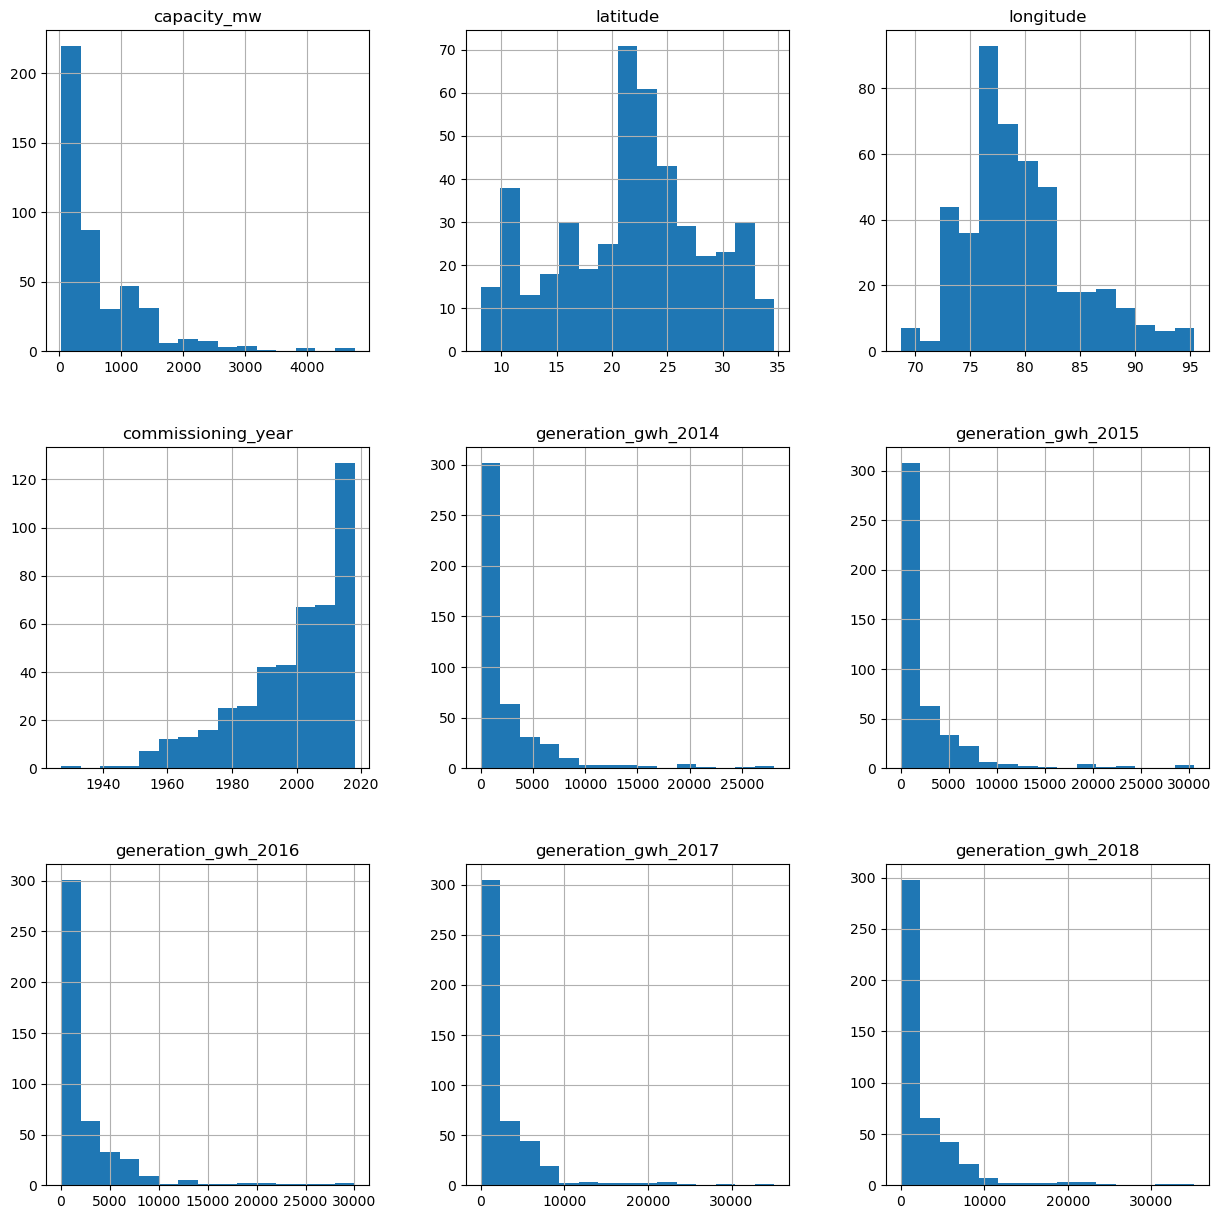

In [26]:
df.hist(bins=15,figsize=(15,15));

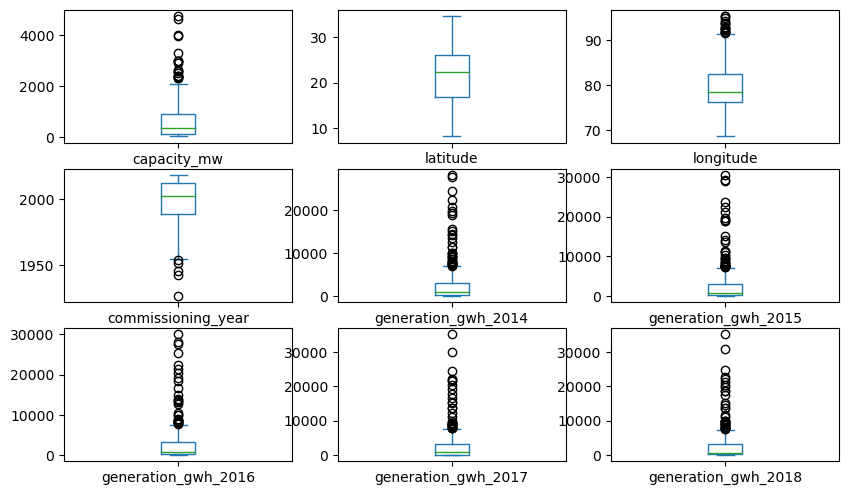

In [27]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(10,10));

## Understanding Feature Relationships

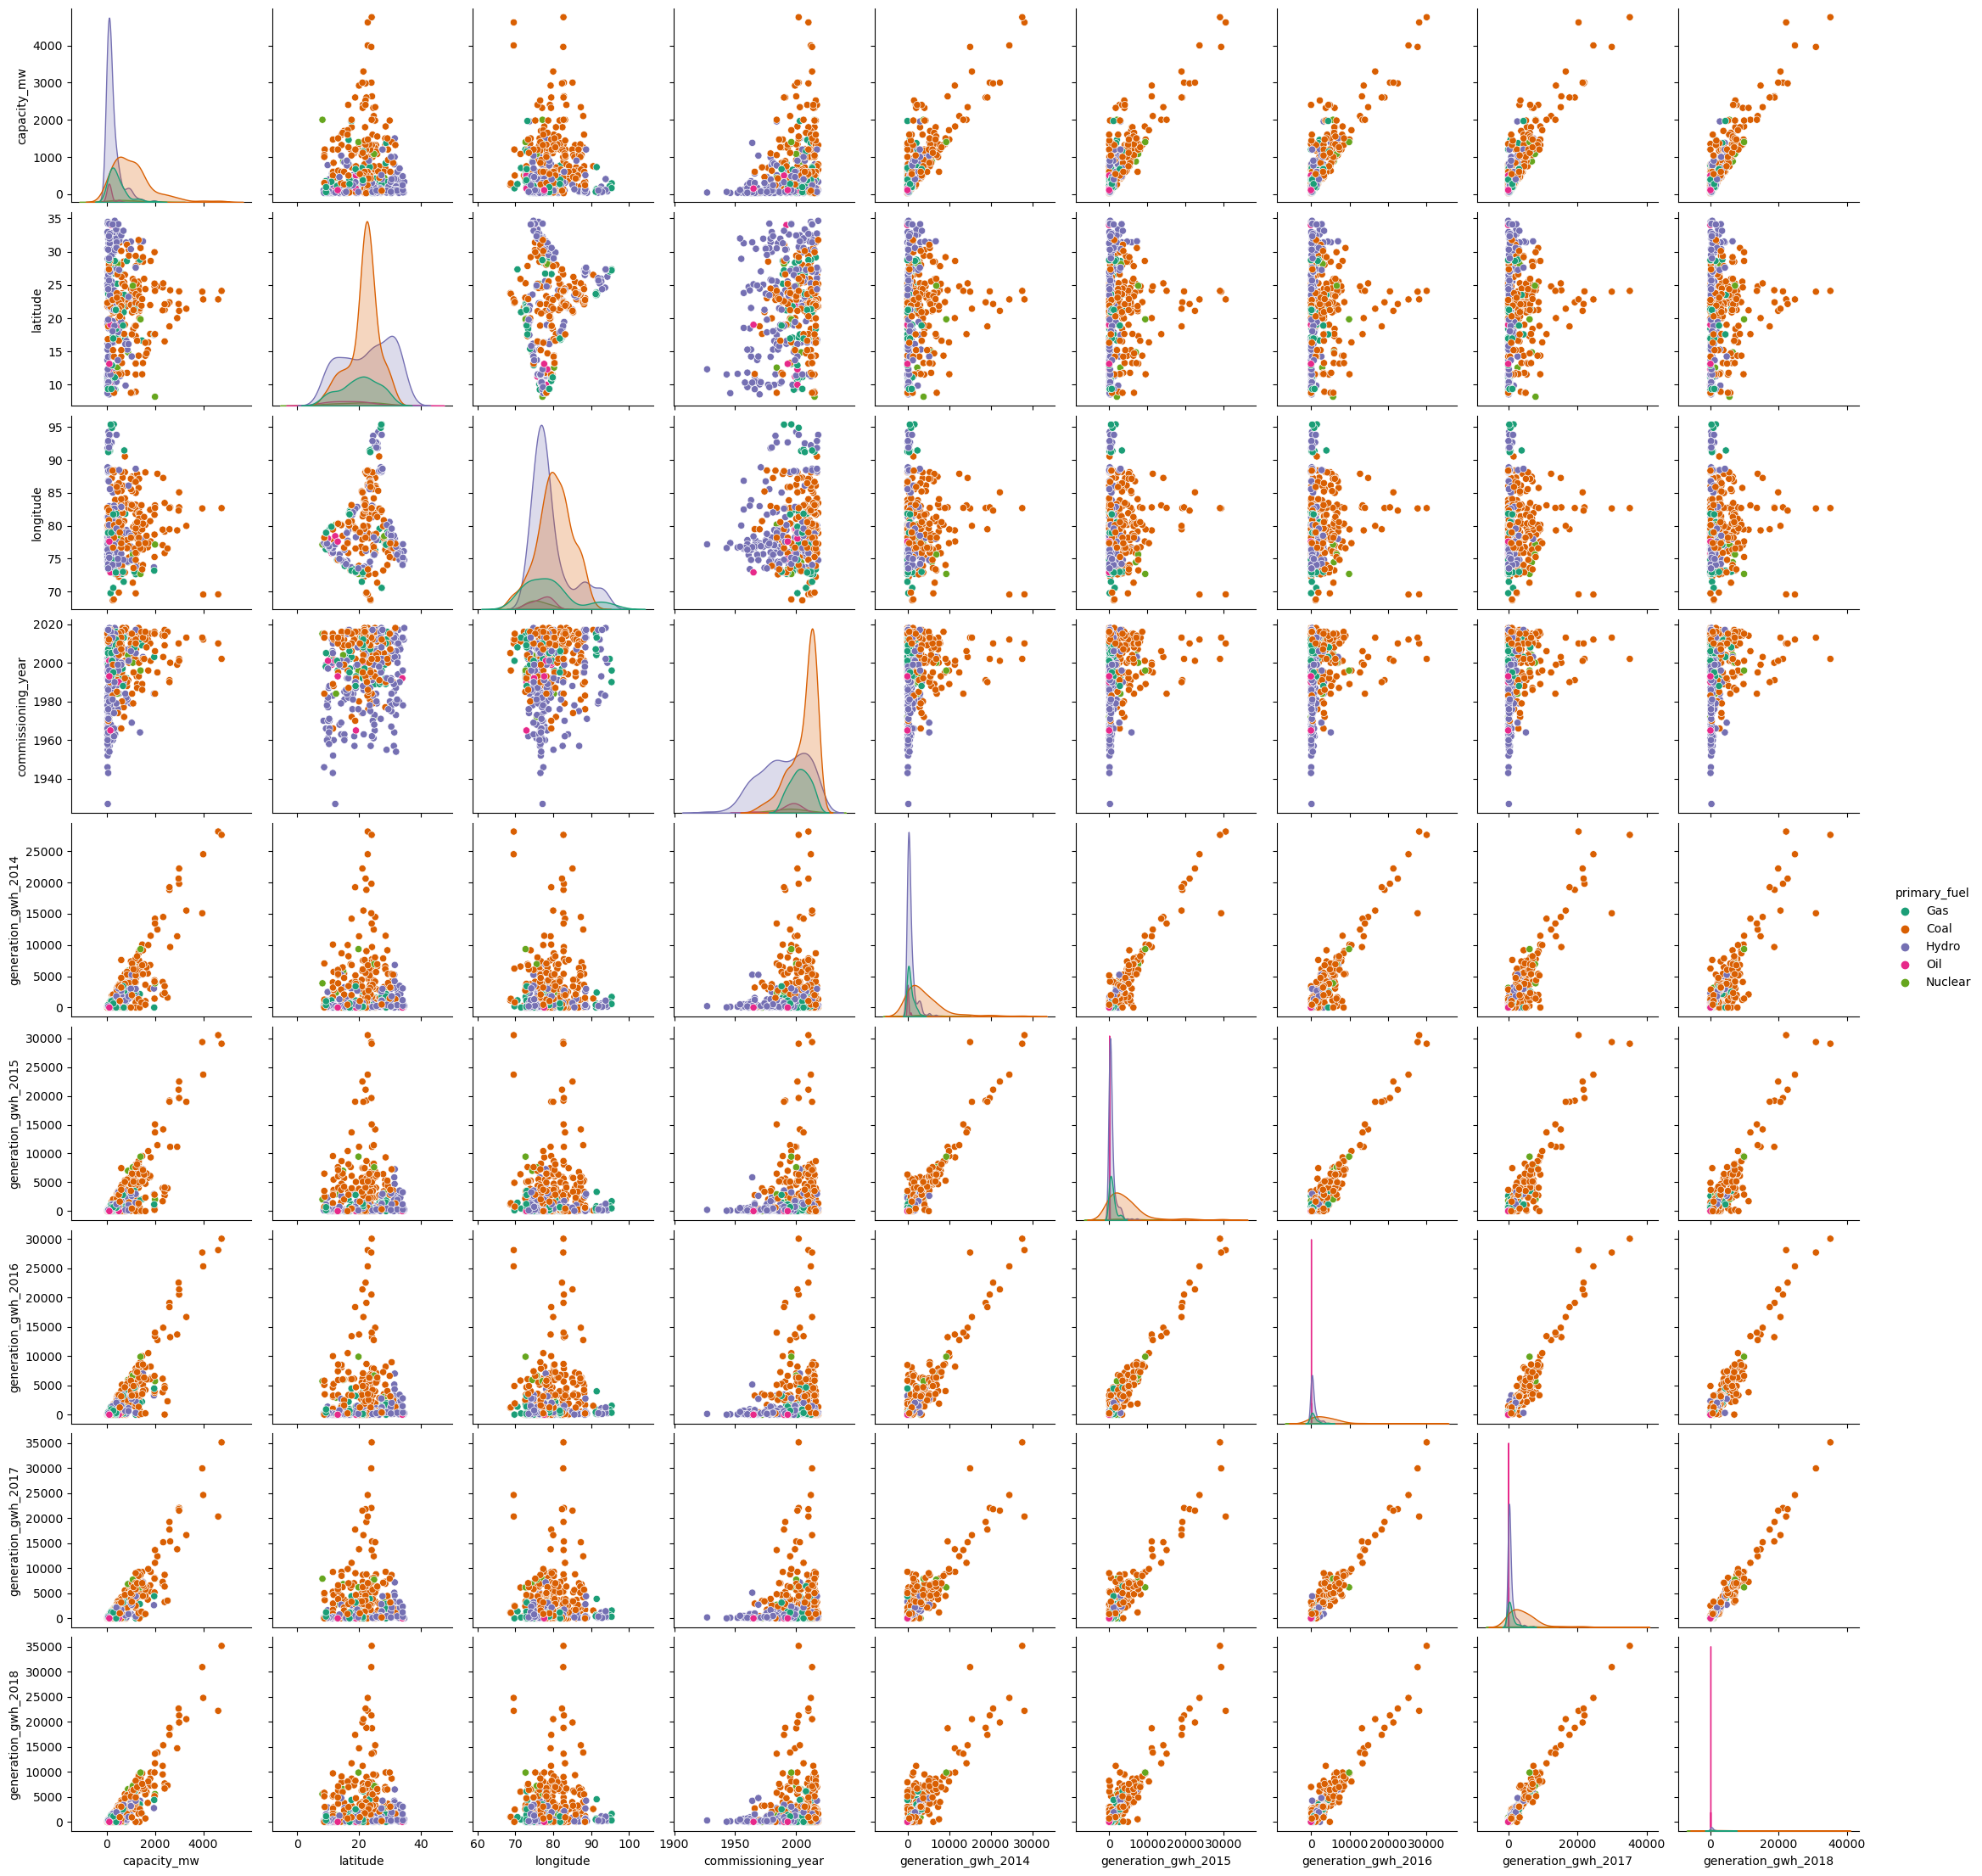

In [28]:
sns.pairplot(df, palette="Dark2", hue='primary_fuel');

In [3]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=1, linecolor='black');

NameError: name 'df' is not defined

<Figure size 2000x1500 with 0 Axes>

In [30]:
from sklearn.preprocessing import OrdinalEncoder

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OrdinalEncoder().fit_transform(df[i].values.reshape(-1, 1))
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,135.0,23.8712,91.3602,1.0,1.0,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,0.0,4.0,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,0.0,4.0,2005.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,2.0,2.0,1970.0,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.0,32.2258,77.2070,2.0,2.0,2010.0,674.391100,721.335200,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...,...,...,...
890,540.0,20.2727,78.9792,0.0,4.0,2010.0,1045.820000,1651.158900,1229.480000,999.170000,940.390000
893,62.4,30.3033,77.5684,2.0,2.0,1991.0,184.453100,183.000000,204.253600,175.866250,236.491600
899,600.0,30.1081,77.3257,0.0,4.0,2007.0,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180
901,106.6,13.1156,77.5838,4.0,4.0,1993.0,0.000000,0.000000,0.000000,0.000000,0.000000


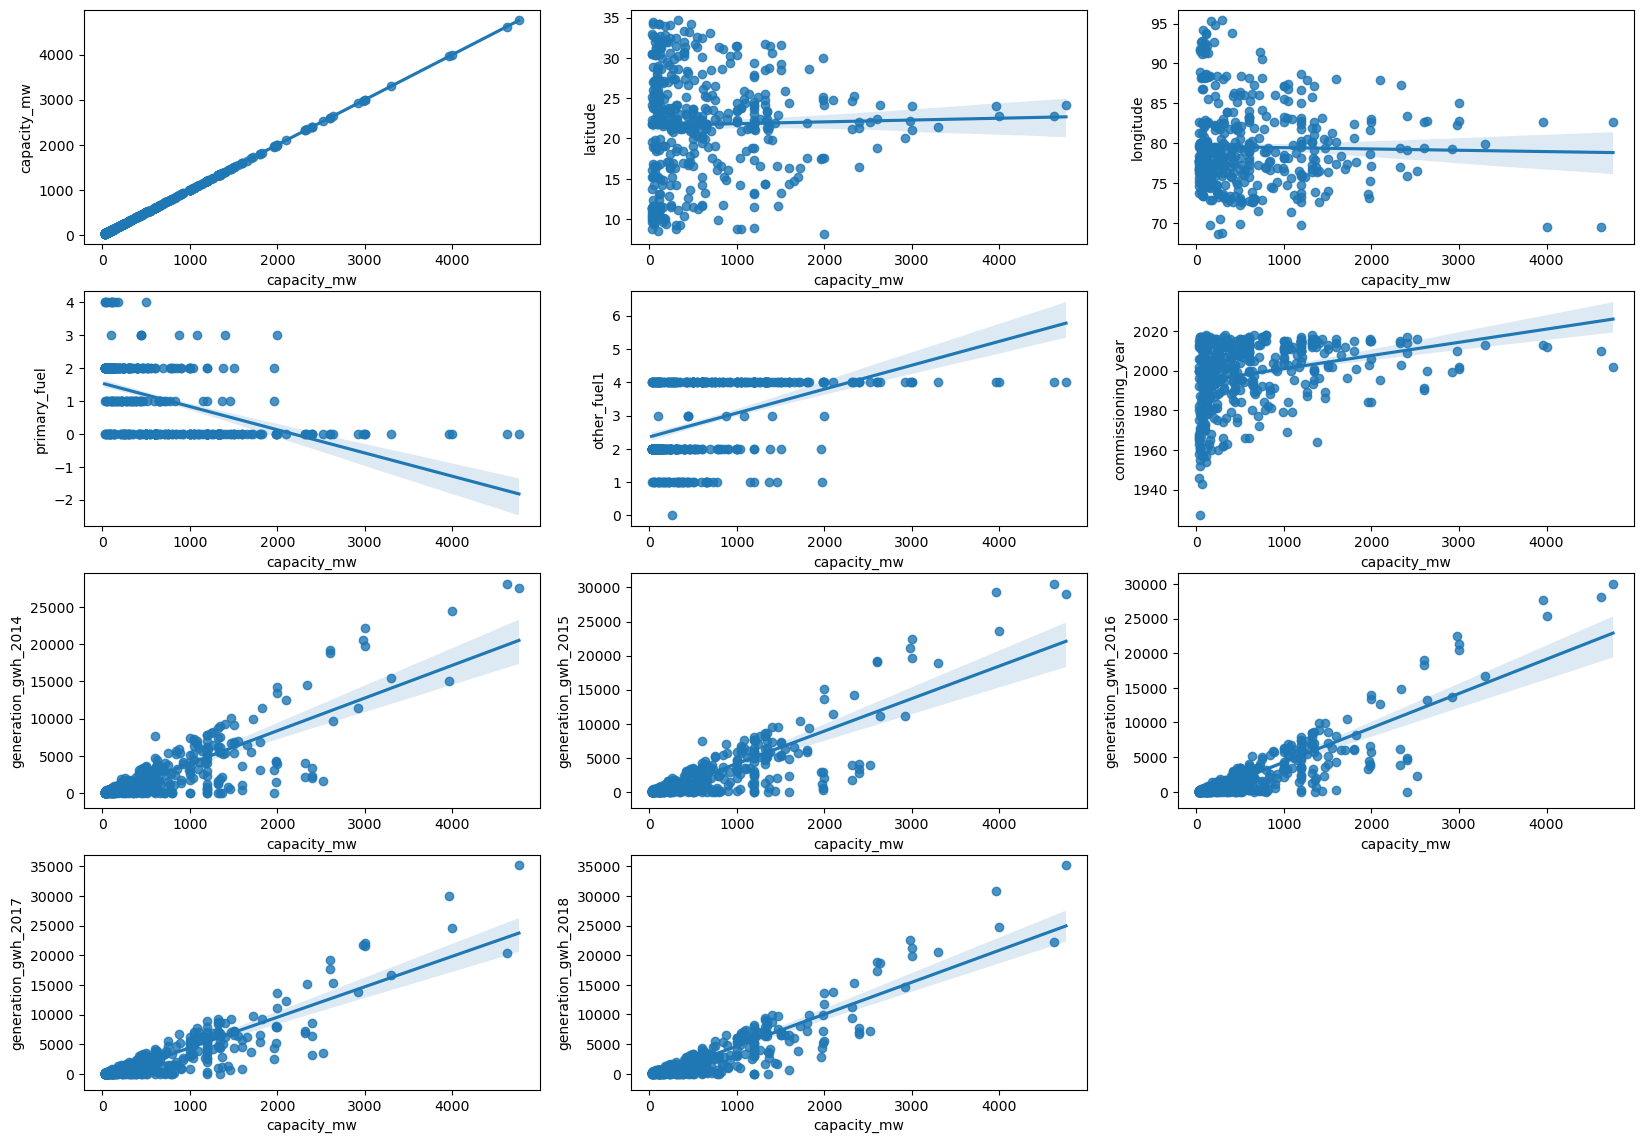

In [31]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=11:
        plt.subplot(7,3,p)
        sns.regplot(x='capacity_mw', y=i, data=df)
        plt.xlabel('capacity_mw')
        plt.ylabel(i)
    p+=1
plt.show()

## Model Preparation - primary_fuel

In [32]:
df_skew = df.skew()
df_skew

capacity_mw            2.223682
latitude              -0.187552
longitude              0.829420
primary_fuel           0.403114
other_fuel1           -0.117380
commissioning_year    -1.073404
generation_gwh_2014    3.482917
generation_gwh_2015    3.741129
generation_gwh_2016    3.570323
generation_gwh_2017    3.595844
generation_gwh_2018    3.479477
dtype: float64

In [33]:
for index, value in df_skew.items():
    if value > 0.5 or value < -0.5:
        df[index] = np.cbrt(df[index])
df.skew()

capacity_mw            0.489461
latitude              -0.187552
longitude              0.714444
primary_fuel           0.403114
other_fuel1           -0.117380
commissioning_year    -1.086363
generation_gwh_2014    0.582161
generation_gwh_2015    0.650286
generation_gwh_2016    0.608702
generation_gwh_2017    0.510030
generation_gwh_2018    0.510740
dtype: float64

In [34]:
x = df.drop(['primary_fuel'], axis=1)
y = df[['primary_fuel']]

In [35]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
x_os, y_os = oversampler.fit_resample(x, y)

In [36]:
x_os

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,5.129928,23.871200,4.503868,1.000000,12.607604,8.516872,9.449397,9.604586,8.723154,8.555526
1,12.164404,21.960300,4.351694,4.000000,12.630630,14.479241,18.086385,18.413278,17.528476,19.380155
2,6.299605,23.768900,4.094514,4.000000,12.609701,10.487274,10.652651,10.554561,10.470554,9.921570
3,3.914868,10.454700,4.254465,2.000000,12.535897,5.401077,5.339087,3.945540,4.475248,3.642479
4,5.768998,32.225800,4.258130,2.000000,12.620174,8.769415,8.968346,8.775190,8.791913,8.336285
...,...,...,...,...,...,...,...,...,...,...
940,3.499300,20.562650,4.295258,4.000000,12.595381,0.000000,0.000000,0.000000,0.000000,0.000000
941,7.617797,18.333811,4.187606,1.298433,12.580478,8.858353,2.554026,0.000000,0.400592,0.000000
942,7.668595,18.439891,4.185981,1.250941,12.580112,8.907370,2.540052,0.000000,0.336843,0.000000
943,4.706177,10.186698,4.266378,4.000000,12.600588,6.167321,3.709477,2.428191,3.627963,0.247598


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_os.values,i)
                        for i in range(len(x_os.columns))]
vif["Features"] = x_os.columns

vif

,VIF values,Features
0,27.332193,capacity_mw
1,12.543387,latitude
2,3461.821319,longitude
3,7.415851,other_fuel1
4,3513.741492,commissioning_year
5,25.121982,generation_gwh_2014
6,40.251607,generation_gwh_2015
7,72.987195,generation_gwh_2016
8,87.289087,generation_gwh_2017
9,57.947907,generation_gwh_2018


In [38]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x_os), columns = x_os.columns)

In [39]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_os.values,i)
                        for i in range(len(x_os.columns))]
vif["Features"] = x_os.columns

vif

,VIF values,Features
0,27.332193,capacity_mw
1,12.543387,latitude
2,3461.821319,longitude
3,7.415851,other_fuel1
4,3513.741492,commissioning_year
5,25.121982,generation_gwh_2014
6,40.251607,generation_gwh_2015
7,72.987195,generation_gwh_2016
8,87.289087,generation_gwh_2017
9,57.947907,generation_gwh_2018


In [40]:
xtrain,xtest,ytrain,ytest = train_test_split(x_os,y_os,test_size = .25, random_state = 39)

## Model Creation - primary_fuel

In [41]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose = 0, ignore_warnings=True, custom_metric=None)
models, prediction = clf.fit(xtrain, xtest, ytrain, ytest)
print(models);

 90%|████████▉ | 26/29 [00:01<00:00, 19.84it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2151
[LightGBM] [Info] Number of data points in the train set: 708, number of used features: 10
[LightGBM] [Info] Start training from score -1.606617
[LightGBM] [Info] Start training from score -1.642463
[LightGBM] [Info] Start training from score -1.585710
[LightGBM] [Info] Start training from score -1.592631
[LightGBM] [Info] Start training from score -1.620802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████| 29/29 [00:02<00:00, 13.77it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.97               0.97    None      0.97   
LGBMClassifier                     0.97               0.97    None      0.97   
ExtraTreesClassifier               0.97               0.97    None      0.97   
QuadraticDiscriminantAnalysis      0.96               0.97    None      0.96   
XGBClassifier                      0.96               0.96    None      0.96   
DecisionTreeClassifier             0.96               0.96    None      0.96   
LabelPropagation                   0.95               0.96    None      0.95   
LabelSpreading                     0.95               0.96    None      0.95   
BaggingClassifier                  0.95               0.95    None      0.95   
SVC                                0.95               0.95    None      0.94   
ExtraTreeClassifier                0.94 

## Model Evaluation - primary_fuel

In [42]:
from sklearn.ensemble import RandomForestClassifier
qda_clf = RandomForestClassifier()

In [43]:
qda_clf.fit(xtrain,ytrain)

RandomForestClassifier()

In [44]:
grid_param = {'max_depth': [80, 100, 110],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 300, 1000]}

In [46]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=qda_clf, param_grid=grid_param, cv=2, verbose=3)

In [47]:
grid_search.fit(xtrain,ytrain)

Fitting 2 folds for each of 162 candidates, totalling 324 fits
[CV 1/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.921 total time=   0.1s
[CV 2/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.958 total time=   0.1s
[CV 1/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.915 total time=   0.4s
[CV 2/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.963 total time=   0.3s
[CV 1/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000;, score=0.915 total time=   1.3s
[CV 2/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000;, score=0.960 total time=   1.4s
[CV 1/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.924 total time=   0

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [80, 100, 110], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 300, 1000]},
             verbose=3)

In [48]:
grid_search.best_params_

{'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

## Final Model

When comparing models RandomForestClassifier had the highest accuracy at 0.97, balanced accuracy at 0.97, F1 Score 0.97. The training time of 0.29, which put the model in the middle of the other models, and due to the size of the dataset, it isn't much of a factor.

In [50]:
Final_model = RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100)

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [54]:
rf_clf.fit(xtrain,ytrain)

RandomForestClassifier()

In [55]:
from sklearn.metrics import accuracy_score

Final_model.fit(xtrain,ytrain)
pred = Final_model.predict(xtest)
acc = accuracy_score(ytest,pred)
print(acc*100)

96.20253164556962


## Model Preparation - capacity_mw

In [56]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,3.92,capacity_mw
1,1.10,latitude
2,1.19,longitude
3,1.07,other_fuel1
4,1.27,commissioning_year
5,8.29,generation_gwh_2014
6,14.12,generation_gwh_2015
7,28.53,generation_gwh_2016
8,34.38,generation_gwh_2017
9,22.94,generation_gwh_2018


In [57]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [58]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,3.92,capacity_mw
1,1.10,latitude
2,1.19,longitude
3,1.07,other_fuel1
4,1.27,commissioning_year
5,8.29,generation_gwh_2014
6,14.12,generation_gwh_2015
7,28.53,generation_gwh_2016
8,34.38,generation_gwh_2017
9,22.94,generation_gwh_2018


In [59]:
xc = df.drop(['capacity_mw'], axis=1)
yc = df[['capacity_mw']]

In [60]:
xctrain,xctest,yctrain,yctest = train_test_split(xc,yc,test_size = .25, random_state = 39)

## Model Creation - capacity_mw

In [61]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
reg_models, predictions = reg.fit(xctrain, xctest, yctrain, yctest)
print(reg_models)

 79%|███████▊  | 33/42 [00:01<00:00, 25.78it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:02<00:00, 20.17it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 336, number of used features: 10
[LightGBM] [Info] Start training from score 7.456341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## Model Evaluation - capacity_mw

In [62]:
from sklearn.ensemble import RandomForestRegressor
rfr_clf = RandomForestRegressor()

In [63]:
rfr_clf.fit(xctrain,yctrain)

RandomForestRegressor()

In [64]:
grid_params = {'n_estimators' : [100, 300, 500, 1000], 
              'criterion':['squared_error', 'absolute_error'], 
              'max_features':['sqrt', 'log2'], 
              'min_samples_split':[2, 10, 100],
              'max_depth':[5, 15, 30]}

In [65]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rfr_clf, param_grid=grid_params, cv=2, verbose=3)

In [66]:
grid_search.fit(xctrain,yctrain)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.825 total time=   0.0s
[CV 2/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.842 total time=   0.0s
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=300;, score=0.828 total time=   0.2s
[CV 2/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=300;, score=0.845 total time=   0.3s
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.826 total time=   0.4s
[CV 2/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.846 total time=   0.5s
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, 

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 15, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 10, 100],
                         'n_estimators': [100, 300, 500, 1000]},
             verbose=3)

In [67]:
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 100}

## Final Model

When comparing models RandomForestRegressor had the highest adjusted r2 score of 0.85 and r2 score of 0.86 with the lowest RMSE of 0.94. It did have a long training time of 1.16, but that wasn't much of a factor due to the size of the dataset.

In [68]:
Final_model_C = RandomForestRegressor(criterion='squared_error', max_depth=30, max_features='sqrt', min_samples_split=2, n_estimators=300)

In [69]:
Final_model_C.fit(xctrain, yctrain)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=300)

In [70]:
from sklearn.metrics import r2_score

rd_pred= Final_model_C.predict(xctest)
r2s=r2_score(yctest, rd_pred)
print('r2 score: ', r2s*100)

r2 score:  85.18064389267046
